In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import httpx
import json

In [4]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.autolayout'] = True
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlepad"] = 40

# Exploring IMBD's Top 250 Movies (August 2024)

In [2]:
df = pd.read_csv("IMDB_Top250.csv")

In [3]:
df

,title_id,name,poster,description,rating,rating_count,content_rating,genre,date_published,keywords,...,opening_weekend_gross_currency,aspect_ratios,colorations,spoken_languages,filming_locations,goofs,alternate_versions,prestigious_award_wins,prestigious_award_nominations,prestigious_award_type
0,tt0111161,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...,A Maine banker convicted of the murder of his ...,9.3,2935175,R,['Drama'],1994-10-14,"prison,based on the works of stephen king,esca...",...,USD,['1.85 : 1'],NaN,['English'],"Mansfield Reformatory - 100 Reformatory Road, ...",107,5,0,7,Oscar
1,tt0068646,The Godfather,https://m.media-amazon.com/images/M/MV5BNTc0ZD...,The aging patriarch of an organized crime dyna...,9.2,2045906,R,"['Crime', 'Drama']",1972-03-24,"mafia,patriarch,crime family,organized crime,g...",...,USD,['1.85 : 1'],Color,"['English', 'Italian', 'Latin']","Forza d'Agrò, Messina, Sicily, Italy",175,8,3,8,Oscar
2,tt0468569,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...,When the menace known as the Joker wreaks havo...,9.0,2915611,PG-13,"['Action', 'Crime', 'Drama']",2008-07-25,"psychopath,superhero,moral dilemma,clown,crimi...",...,USD,['2.39 : 1'],Color,"['English', 'Mandarin']","Chicago, Illinois, USA",169,1,2,6,Oscar
3,tt0071562,The Godfather Part II,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The early life and career of Vito Corleone in ...,9.0,1383317,R,"['Crime', 'Drama']",1974-12-18,"revenge,sicily,sicilian mafia,mother son relat...",...,USD,['1.85 : 1'],Color,"['English', 'Italian', 'Spanish', 'Latin', 'Si...","Kaiser Estate, 4000 W Lake Blvd, Homewood, Lak...",97,10,6,5,Oscar
4,tt0050083,12 Angry Men,https://m.media-amazon.com/images/M/MV5BMWU4N2...,The jury in a New York City murder trial is fr...,9.0,881539,B,"['Crime', 'Drama']",1957-04-10,"jury,murder,dialogue driven,trial,jury room",...,USD,['1.85 : 1'],Black and White,['English'],"New York County Courthouse - 60 Centre Street,...",26,1,0,3,Oscar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,tt0061512,Cool Hand Luke,https://m.media-amazon.com/images/M/MV5BNjcwNT...,A laid-back Southern man is sentenced to two y...,8.1,190594,Approved,"['Crime', 'Drama']",1967-11-01,"prison,fugitive,hard boiled egg,loss of mother...",...,USD,['2.35 : 1'],Color,['English'],"Jacksonville, Florida, USA",17,0,1,3,Oscar
246,tt0025316,It Happened One Night,https://m.media-amazon.com/images/M/MV5BMDg5Mm...,A rogue reporter trailing a runaway heiress fo...,8.1,113905,Approved,"['Comedy', 'Romance']",1934-02-22,"road movie,bus,reporter,road trip,haystack",...,USD,['1.37 : 1'],Black and White,['English'],"Busch Gardens - S. Grove Avenue, Pasadena, Cal...",30,0,5,0,Oscar
247,tt0103639,Aladdin,https://m.media-amazon.com/images/M/MV5BMmQwYW...,A kind-hearted street urchin and a power-hungr...,8.0,475614,G,"['Animation', 'Adventure', 'Comedy']",1992-11-25,"genie,three wishes,princess,prince,flying carpet",...,USD,"['1.78 : 1', '1.85 : 1']",Color,['English'],Walt Disney Feature Animation - 500 S. Buena V...,242,1,2,3,Oscar
248,tt0087884,"Paris, Texas",https://m.media-amazon.com/images/M/MV5BM2RjMm...,"Travis Henderson, an aimless drifter who has b...",8.1,123022,R,['Drama'],1984-08-23,"desert,possessive love,father son relationship...",...,USD,[],Color,"['English', 'Spanish']","Marathon Motel & RV Park - Highway 90, Maratho...",16,0,1,3,BAFTA Film Award


## Ratings

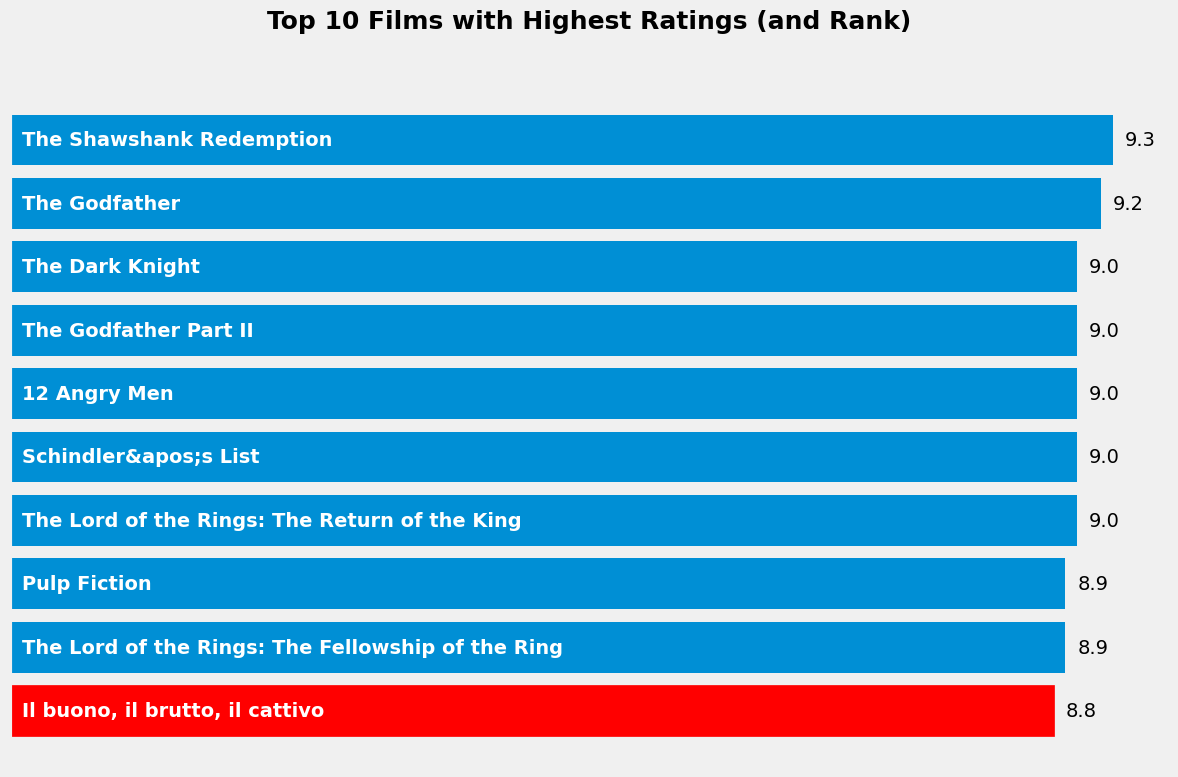

In [10]:
top_10 = df.sort_values(by="rank").head(10)

fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_10["name"], top_10['rating'])
ax.set_title("Top 10 Films with Highest Ratings (and Rank)")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_10["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  


plt.savefig("viz/top-10-rank.png")
plt.show()

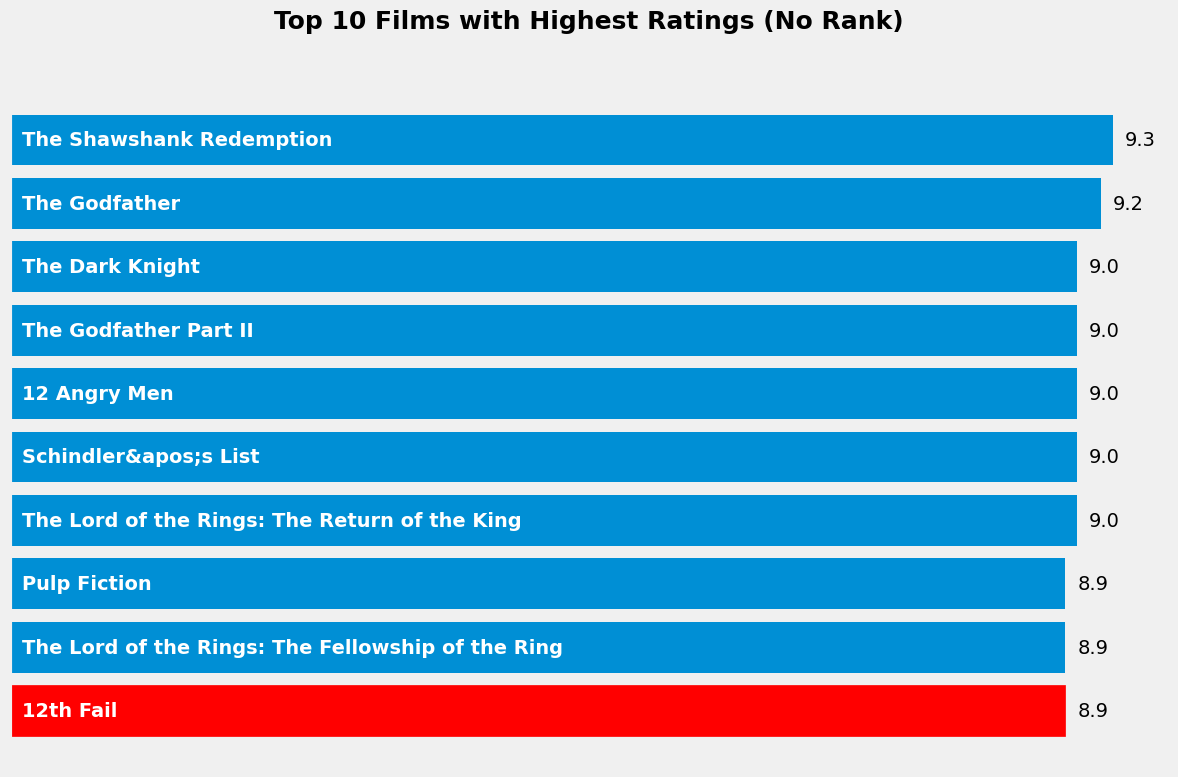

In [13]:
top_10 = df.sort_values(by="rating", ascending=False).head(10).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_10["name"], top_10['rating'])
ax.set_title("Top 10 Films with Highest Ratings (No Rank)")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_10["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  


plt.savefig("viz/top-10-no-rank.png")
plt.show()

In [21]:
df[df["name"].isin(["Il buono, il brutto, il cattivo", "12th Fail"])][["name", "rank", "rating", "rating_count"]]

,name,rank,rating,rating_count
9,"Il buono, il brutto, il cattivo",10,8.8,822301
59,12th Fail,60,8.9,127449


`12th Fail` has almost 7x less ratings, which is why it ranks way lower than `Il buono, il brutto, il cattivo` despite their equal average ratings

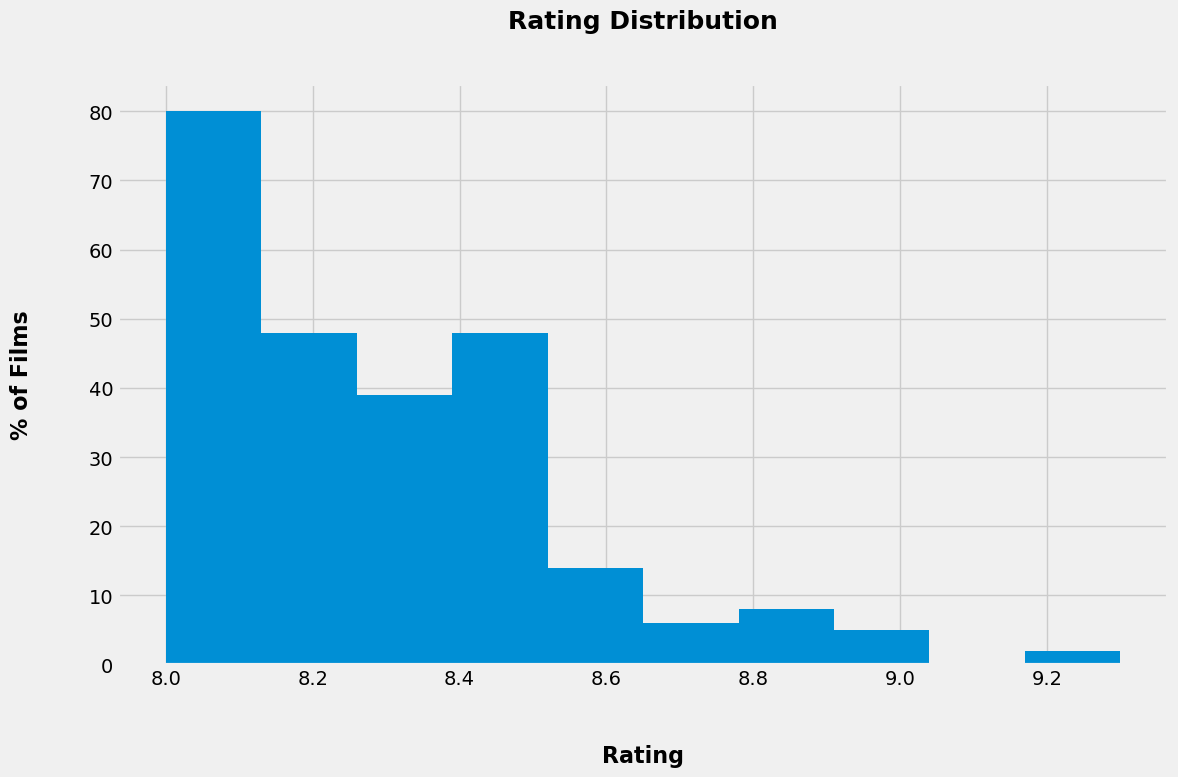

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df["rating"])
ax.set_xlabel("Rating", labelpad=40)
ax.set_ylabel("% of Films", labelpad=40)
ax.set_title("Rating Distribution")
fig.savefig("viz/rating-distribution.png")
plt.show()

In [84]:
df["decade"] = df["release_year"].apply(lambda x: (x // 10) * 10)

In [95]:
top_decades = df.groupby("decade").agg({
    "title_id": "count",
    "rating": "mean",
    "metascore": "mean"
})

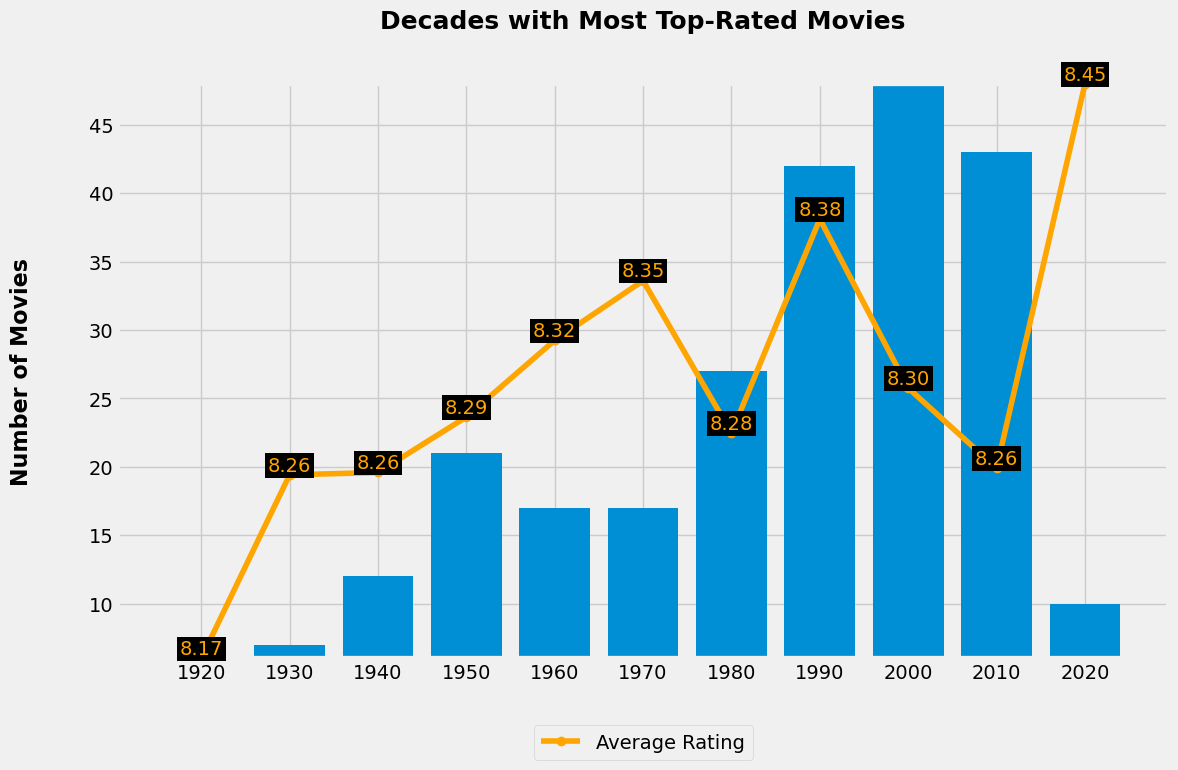

In [96]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(top_decades.index.astype(int).astype(str), top_decades["title_id"])
ax2 = ax1.twinx()

points = ax2.plot(top_decades.index.astype(int).astype(str), top_decades["rating"], c="orange", marker='o', linestyle='-', label="Average Rating")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax1.set_title("Decades with Most Top-Rated Movies")
ax1.set_ylabel("Number of Movies", labelpad=40)
ax1.set_ylim([top_decades["title_id"].min(), top_decades["title_id"].max()])
ax2.set_ylim([top_decades["rating"].min(), top_decades["rating"].max()])
ax2.set_yticks([])
for x, y in zip(top_decades.index.astype(int).astype(str), top_decades["rating"]):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )
plt.show()

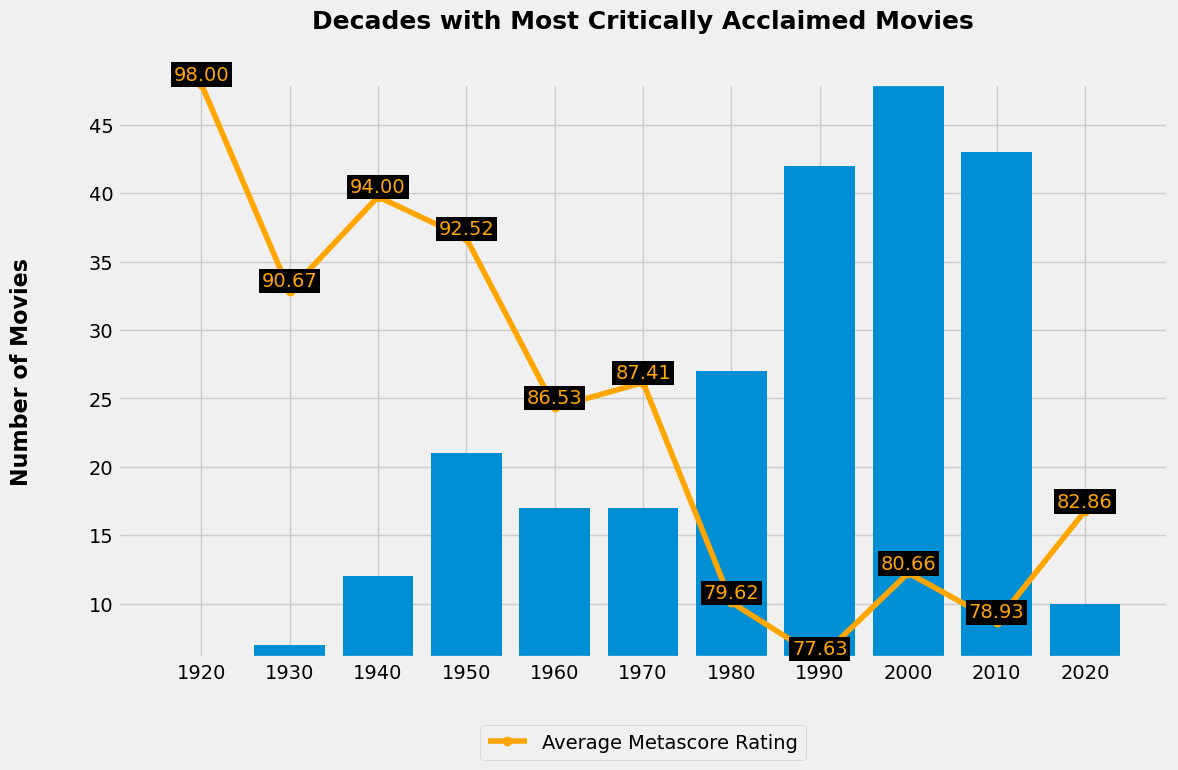

In [98]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(top_decades.index.astype(int).astype(str), top_decades["title_id"])
ax2 = ax1.twinx()

points = ax2.plot(top_decades.index.astype(int).astype(str), top_decades["metascore"], c="orange", marker='o', linestyle='-', label="Average Metascore Rating")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax1.set_title("Decades with Most Critically Acclaimed Movies")
ax1.set_ylabel("Number of Movies", labelpad=40)
ax1.set_ylim([top_decades["title_id"].min(), top_decades["title_id"].max()])
ax2.set_ylim([top_decades["metascore"].min(), top_decades["metascore"].max()])
ax2.set_yticks([])
for x, y in zip(top_decades.index.astype(int).astype(str), top_decades["metascore"]):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )
plt.show()

Universally Acclaimed Films (sorted by rating, metascore, and prestigious award wins)

In [115]:
df.sort_values(by=["rating", "metascore", "prestigious_award_wins"], ascending=False).dropna()[["rank", "name", "rating", "metascore", "prestigious_award_wins"]].head(10)

,rank,name,rating,metascore,prestigious_award_wins
1,2,The Godfather,9.2,100.0,3
4,5,12 Angry Men,9.0,97.0,0
5,6,Schindler&apos;s List,9.0,95.0,7
6,7,The Lord of the Rings: The Return of the King,9.0,94.0,11
3,4,The Godfather Part II,9.0,90.0,6
2,3,The Dark Knight,9.0,84.0,2
7,8,Pulp Fiction,8.9,95.0,1
8,9,The Lord of the Rings: The Fellowship of the Ring,8.9,92.0,4
11,12,The Lord of the Rings: The Two Towers,8.8,87.0,2
10,11,Forrest Gump,8.8,82.0,6


In [119]:
most_oscars = df[df["prestigious_award_type"] == "Oscar"].sort_values(by="prestigious_award_wins", ascending=False).head(10)

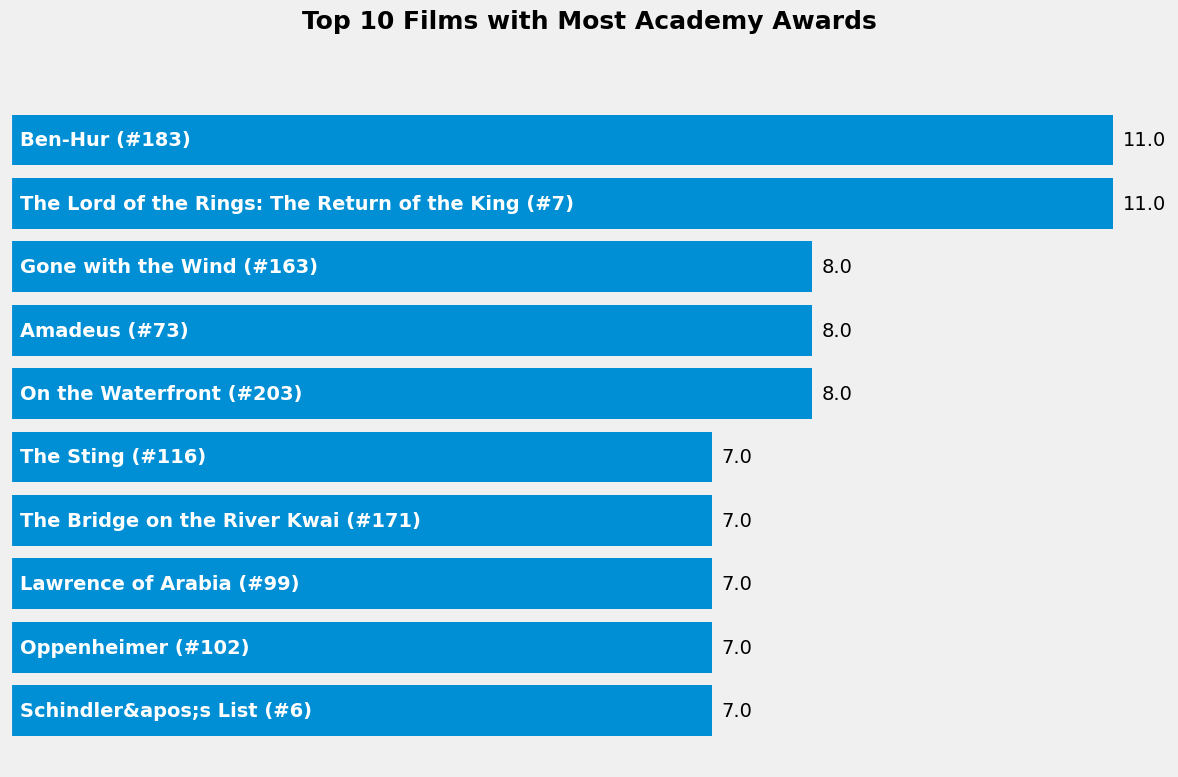

In [127]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(most_oscars["name"], most_oscars["prestigious_award_wins"])
ax.set_title("Top 10 Films with Most Academy Awards")
ax.invert_yaxis()
ax.set_xticks([])

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            f"{most_oscars['name'].iloc[idx]} (#{most_oscars['rank'].iloc[idx]})",
            ha="left", va="center",  
            color="white",
            fontweight='bold')  


plt.savefig("viz/most-oscars.png")
plt.show()

In [129]:
no_major_awards = df[df["prestigious_award_type"].isna()].sort_values(by="rank").head(10)

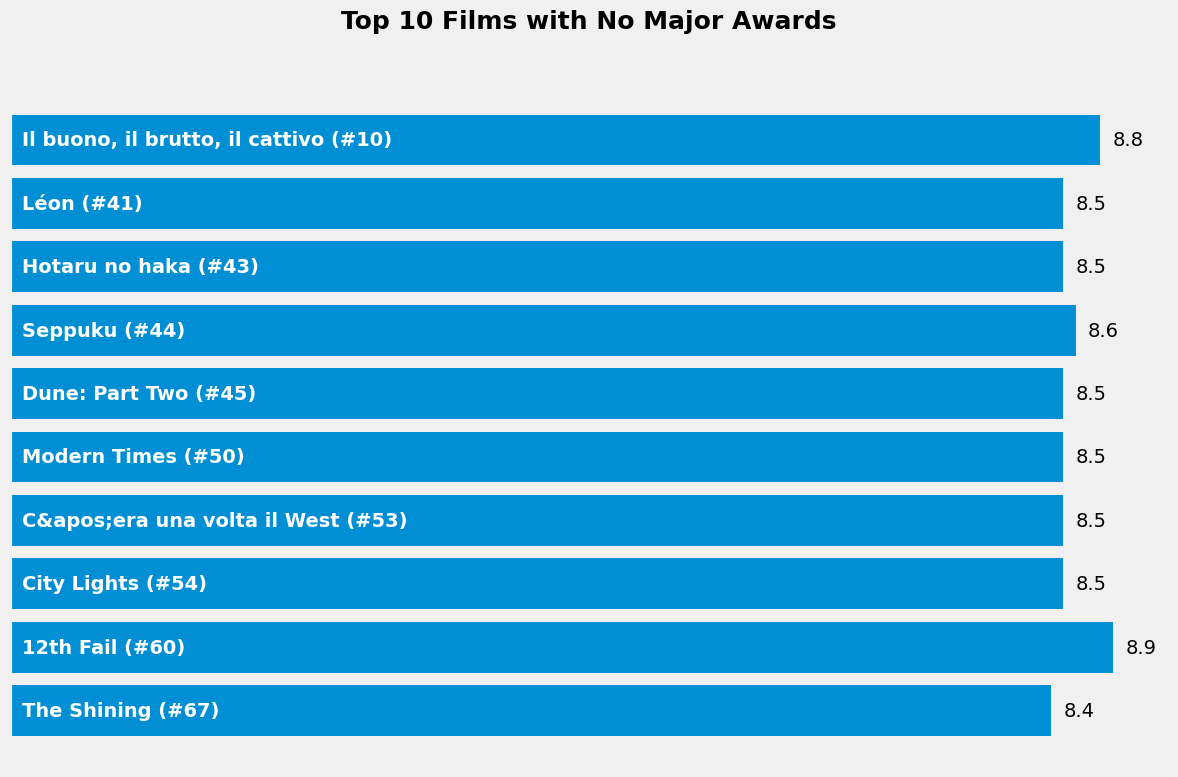

In [133]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(no_major_awards["name"], no_major_awards["rating"])
ax.set_title("Top 10 Films with No Major Awards")
ax.invert_yaxis()
ax.set_xticks([])

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            f"{no_major_awards['name'].iloc[idx]} (#{no_major_awards['rank'].iloc[idx]})",
            ha="left", va="center",  
            color="white",
            fontweight='bold')  


plt.savefig("viz/no-major-awards.png")
plt.show()

In [140]:
df[(df["wins"] == 0) & (df["nominations"] == 0)].sort_values(by="rank").head(10)

,title_id,name,poster,description,rating,rating_count,content_rating,genre,date_published,keywords,...,aspect_ratios,colorations,spoken_languages,filming_locations,goofs,alternate_versions,prestigious_award_wins,prestigious_award_nominations,prestigious_award_type,decade
42,tt0095327,Hotaru no haka,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,A young boy and his little sister struggle to ...,8.5,317912,Not Rated,"['Animation', 'Drama', 'War']",1988-04-16,"food,orphan,1940s,survival,firefly",...,['1.85 : 1'],Color,['Japanese'],NaN,1,0,0,0,NaN,1980
53,tt0021749,City Lights,https://m.media-amazon.com/images/M/MV5BM2U4Nj...,"With the aid of a wealthy erratic tippler, a d...",8.5,198410,G,"['Comedy', 'Drama', 'Romance']",1931-03-07,"slapstick comedy,butler,grandmother,flower,mil...",...,[],Black and White,"['None', 'English']","Chaplin Studios - 1416 N. La Brea Avenue, Holl...",19,3,0,0,NaN,1930
89,tt0091251,Idi i smotri,https://m.media-amazon.com/images/M/MV5BODM4Nj...,"After finding an old rifle, a young boy joins ...",8.4,100862,Not Rated,"['Drama', 'Thriller', 'War']",1985-09-03,"mass murder,nazi occupied soviet union,extermi...",...,['1.37 : 1'],Color,"['Belarusian', 'Russian', 'German']",Soviet Union,8,0,0,0,NaN,1980
106,tt0022100,M - Eine Stadt sucht einen Mörder,https://m.media-amazon.com/images/M/MV5BODA4OD...,When the police in a German city are unable to...,8.3,170758,Passed,"['Crime', 'Mystery', 'Thriller']",1931-08-31,"serial killer,murder,loss of daughter,urban se...",...,"['1.19 : 1', '1.20 : 1']",Black and White,['German'],"Staaken, Spandau, Berlin, Germany",4,5,0,0,NaN,1930
133,tt0012349,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,"The Tramp cares for an abandoned child, but ev...",8.2,136636,Passed,"['Comedy', 'Drama', 'Family']",1924-07-10,"the little tramp character,1910s,social worker...",...,['1.33 : 1'],NaN,"['None', 'English']","Chaplin Studios - 1416 N. La Brea Avenue, Holl...",17,2,0,0,NaN,1920
200,tt0015324,Sherlock Jr.,https://m.media-amazon.com/images/M/MV5BZWFhOG...,"A film projectionist longs to be a detective, ...",8.2,58309,Passed,"['Action', 'Comedy', 'Romance']",1924-05-11,"false accusation,surrealism,national film regi...",...,['1.33 : 1'],Black and White,"['None', 'English']","3630 Pasadena Ave, Los Angeles, California, USA",3,2,0,0,NaN,1920
210,tt0046438,Tôkyô monogatari,https://m.media-amazon.com/images/M/MV5BM2E1Zm...,An old couple visit their children and grandch...,8.1,69963,Not Rated,['Drama'],1953-11-03,"old man,old woman,deathbed,houseguest,affection",...,['1.37 : 1'],Black and White,"['Japanese', 'English']","Tokyo, Japan",3,0,0,0,NaN,1950
